# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Faishal Ali Dhiaulhaq
- Email: faishalald22@gmail.com
- Id Dicoding:

# Persiapan

## Menyiapkan Library yang Dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import json

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import ADASYN
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

import optuna
import tensorflow as tf
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

import joblib

c:\Users\legion\miniconda3\envs\ds-terap\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Tampilkan semua kolom
pd.set_option('display.max_columns', None)

# Tampilkan semua baris (opsional, jika ingin)
pd.set_option('display.max_rows', None)

# Atur lebar kolom agar tidak terpotong (opsional)
pd.set_option('display.width', 0)

# Hindari pemotongan isi kolom
pd.set_option('display.max_colwidth', None)

# Data Gathering

In [3]:
DATA_PATH = 'data'

df = pd.read_csv(f'{DATA_PATH}/data.csv', encoding='utf-8-sig', sep=';')

In [4]:
df.head(20)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


# Data Understanding

## Data Assessing

**Cek Total Baris dan Kolom**

In [5]:
df.shape

(4424, 37)

Terdapat 4424 total baris data dengan 47 kolom di dalam *dataframe* asli

**Cek Informasi tipe Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Untuk tipe data yang ada sudah benar, namun nantinya perlu menambahkan beberapa *dictionary* berisi identitas setiap kode *unique* setiap kolom untuk kebutuhan visualisasi data.

**Pengecekan Nilai Null**

In [7]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Data tidak ada yang *null* dan dapat disimpulkan bahwa data juga siap untuk dilakukan proses *modelling* nantinya.

**Pengecekan Data Duplikat**

In [8]:
df.duplicated().sum()

np.int64(0)

Tidak ada data duplikat.

# Data Preparation / Preprocessing

## Exploratory Data Analysis (EDA)

### Deskripsi Umum Dataset

In [9]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


*Range* pada setiap data masih dalam rentang nilai *unique* yang aman, serta sesuai dengan yang ada pada dokumentasi dataset.

In [10]:
# Value asli kolom kategorikal
marital_status_val = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}

application_mode_val = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old 42 - Transfer',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)',
}

course_val = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendace)'
}

daytime_evening_val = {1: 'daytime', 0: 'evening'}

previous_qual_val = {
    1: 'Secondary education',
    2: 'Higher education - bachelor\'s degree',
    3: 'Higher education - degree',
    4: 'Higher education - master\'s',
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)',
}

nacionality_val = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian',
}

mother_qual_val = {
    1: 'Secondary Education - 12th Year of Schooling or Eq',
    2: 'Higher Education - Bachelor\'s Degree',
    3: 'Higher Education - Degree',
    4: 'Higher Education - Master\'s',
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    13: '2nd year complementary high school course',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    20: 'Complementary High School Course',
    22: 'Technical-professional course',
    25: 'Complementary High School Course - not concluded',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    31: 'General Course of Administration and Commerce',
    33: 'Supplementary Accounting and Administration',
    34: 'Unknown',
    35: 'Can\'t read or write',
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)',
}

father_qual_val = mother_qual_val.copy()

mother_occupation_val = {
    0: 'Student',
    1: 'Legislative/Executive Power, Directors & Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security, Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    122: 'Health professionals',
    123: 'Teachers',
    125: 'ICT Specialists',
    131: 'Science & Engineering Technicians (Intermediate)',
    132: 'Health Technicians (Intermediate)',
    134: 'Legal, Social, Sports, Cultural Technicians (Intermediate)',
    141: 'Office workers, secretaries, data operators',
    143: 'Accounting, Finance, Registry-related Operators',
    144: 'Other Administrative Support Staff',
    151: 'Personal Service Workers',
    152: 'Sellers',
    153: 'Personal Care Workers and Similar',
    171: 'Skilled Construction Workers (except electricians)',
    173: 'Printing, Instrument Making, Artisans, etc.',
    175: 'Food, Wood, Clothing Industry Workers & Craftsmen',
    191: 'Cleaning Workers',
    192: 'Unskilled Agriculture/Fisheries/Forestry Workers',
    193: 'Unskilled Industry/Construction/Transport Workers',
    194: 'Meal Preparation Assistants'
}

father_occupation_val = {
    0: 'Student',
    1: 'Legislative/Executive Representatives, Directors & Executives',
    2: 'Intellectual and Scientific Specialists',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative Staff',
    5: 'Personal Services, Security, Safety Workers and Sellers',
    6: 'Skilled Agricultural, Fishery, Forestry Workers',
    7: 'Skilled Industry, Construction and Craftsmen Workers',
    8: 'Machine Operators and Assemblers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces Personnel',
    112: 'Administrative and Commercial Services Directors',
    114: 'Hotel, Catering, Trade, and Other Services Directors',
    121: 'Specialists in Physical Sciences, Math, Engineering, etc.',
    122: 'Health Professionals',
    123: 'Teachers',
    124: 'Specialists in Finance, Admin, PR, Commercial Relations',
    131: 'Science and Engineering Technicians (Intermediate)',
    132: 'Health Technicians (Intermediate)',
    134: 'Legal, Social, Sports, Cultural Technicians (Intermediate)',
    135: 'ICT Technicians',
    141: 'Office Workers, Secretaries, Data Operators',
    143: 'Data, Accounting, Statistical, Financial, Registry Operators',
    144: 'Other Administrative Support Staff',
    151: 'Personal Service Workers',
    152: 'Sellers',
    153: 'Personal Care Workers and Similar',
    154: 'Protection and Security Services Personnel',
    161: 'Market-Oriented Farmers & Skilled Agricultural Workers',
    163: 'Subsistence Farmers, Fishers, Hunters, Gatherers',
    171: 'Skilled Construction Workers (except electricians)',
    172: 'Skilled Metallurgy and Metalworking Workers',
    174: 'Skilled Electrical and Electronics Workers',
    175: 'Food, Wood, Clothing Industry Workers and Craftsmen',
    181: 'Fixed Plant and Machine Operators',
    182: 'Assembly Workers',
    183: 'Vehicle Drivers and Mobile Equipment Operators',
    192: 'Unskilled Agricultural, Fishery, Forestry Workers',
    193: 'Unskilled Industry, Construction, Manufacturing, Transport Workers',
    194: 'Meal Preparation Assistants',
    195: 'Street Vendors (non-food) and Street Service Providers',
}

displaced_val = {
    1: 'yes',
    0: 'no',
}

edu_special_needs_val = displaced_val.copy()

debtor = displaced_val.copy()

tuition_fees_val = displaced_val.copy()

gender_val = {
    1: 'male',
    0: 'female',
}

scholarship_hold_val = displaced_val.copy()

international_val = displaced_val.copy()

Setelah membuat dictionary nilai asli, maka perlu disimpan untuk kebutuhan *production*.

In [11]:
with open(f'{DATA_PATH}/jsons/marital_status_val.json', 'w') as f:
    json.dump(marital_status_val, f)

with open(f'{DATA_PATH}/jsons/application_mode_val.json', 'w') as f:
    json.dump(application_mode_val, f)

with open(f'{DATA_PATH}/jsons/course_val.json', 'w') as f:
    json.dump(course_val, f)

with open(f'{DATA_PATH}/jsons/daytime_evening_val.json', 'w') as f:
    json.dump(daytime_evening_val, f)

with open(f'{DATA_PATH}/jsons/previous_qual_val.json', 'w') as f:
    json.dump(previous_qual_val, f)

with open(f'{DATA_PATH}/jsons/nacionality_val.json', 'w') as f:
    json.dump(nacionality_val, f)

with open(f'{DATA_PATH}/jsons/mother_qual_val.json', 'w') as f:
    json.dump(mother_qual_val, f)

with open(f'{DATA_PATH}/jsons/father_qual_val.json', 'w') as f:
    json.dump(father_qual_val, f)

with open(f'{DATA_PATH}/jsons/mother_occupation_val.json', 'w') as f:
    json.dump(mother_occupation_val, f)

with open(f'{DATA_PATH}/jsons/father_occupation_val.json', 'w') as f:
    json.dump(father_occupation_val, f)

with open(f'{DATA_PATH}/jsons/displaced_val.json', 'w') as f:
    json.dump(displaced_val, f)

with open(f'{DATA_PATH}/jsons/edu_special_needs_val.json', 'w') as f:
    json.dump(edu_special_needs_val, f)

with open(f'{DATA_PATH}/jsons/debtor.json', 'w') as f:
    json.dump(debtor, f)

with open(f'{DATA_PATH}/jsons/tuition_fees_val.json', 'w') as f:
    json.dump(tuition_fees_val, f)

with open(f'{DATA_PATH}/jsons/gender_val.json', 'w') as f:
    json.dump(gender_val, f)

with open(f'{DATA_PATH}/jsons/scholarship_hold_val.json', 'w') as f:
    json.dump(scholarship_hold_val, f)

with open(f'{DATA_PATH}/jsons/international_val.json', 'w') as f:
    json.dump(international_val, f)

### Visualisasi Kolom Kategorikal Berbentuk Integer

In [12]:
true_cat_cols = ['Marital_status', 'Application_mode', 'Application_order',
                 'Course', 'Daytime_evening_attendance', 'Previous_qualification',
                 'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
                 'Mothers_occupation', 'Fathers_occupation', 'Displaced',
                 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
                 'Gender', 'Scholarship_holder', 'International']

In [13]:
# fungsi untuk menampilkan data numerik
def visualize_numerical(df, cols):
    df[cols].hist(figsize=(25, 15), bins=15, color='blue', edgecolor='black')

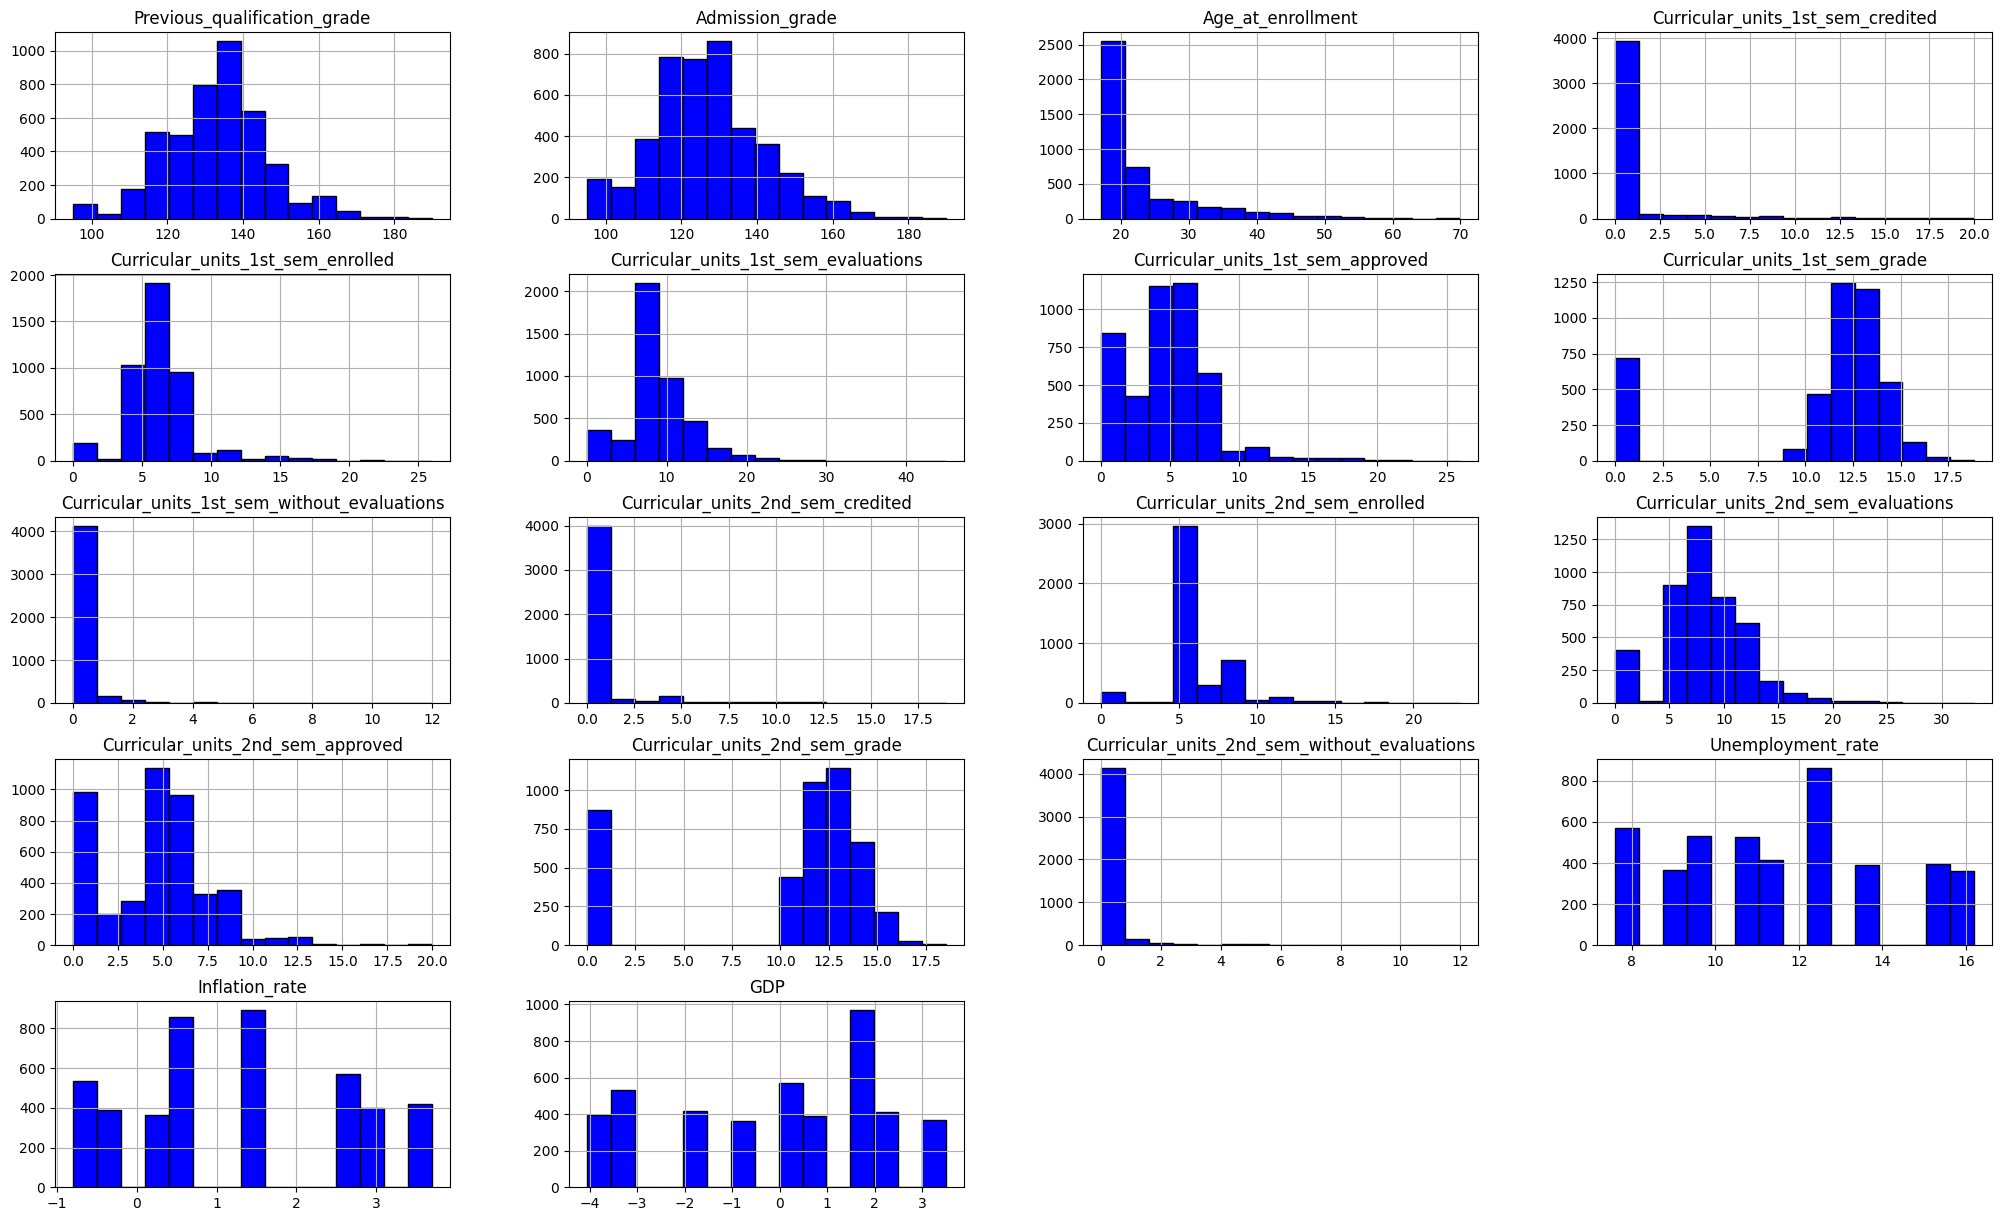

In [14]:
num_cols = [col for col in df.columns if col not in true_cat_cols]

visualize_numerical(df, num_cols)

Visualisasi data numerik menunjukkan bahwa sebagian besar fitur akademik seperti jumlah mata kuliah yang diambil, dievaluasi, dan disetujui memiliki distribusi miring ke kanan (right-skewed), mengindikasikan banyak mahasiswa hanya mengambil sedikit mata kuliah atau tidak mengikuti evaluasi. Nilai akademik seperti **Admission\_grade** dan **Previous\_qualification\_grade** cenderung terdistribusi normal, sedangkan usia saat pendaftaran mayoritas berada di rentang muda (18–20 tahun) dengan sebaran yang juga miring ke kanan. Variabel ekonomi seperti **Unemployment\_rate**, **Inflation\_rate**, dan *GDP* menunjukkan pola distribusi yang lebih kompleks atau multimodal, kemungkinan akibat variasi waktu atau wilayah. Distribusi yang tidak seimbang ini penting untuk dipertimbangkan dalam analisis lanjutan, terutama saat membangun model prediktif.


### Visualisasi Kolom Kategorikal

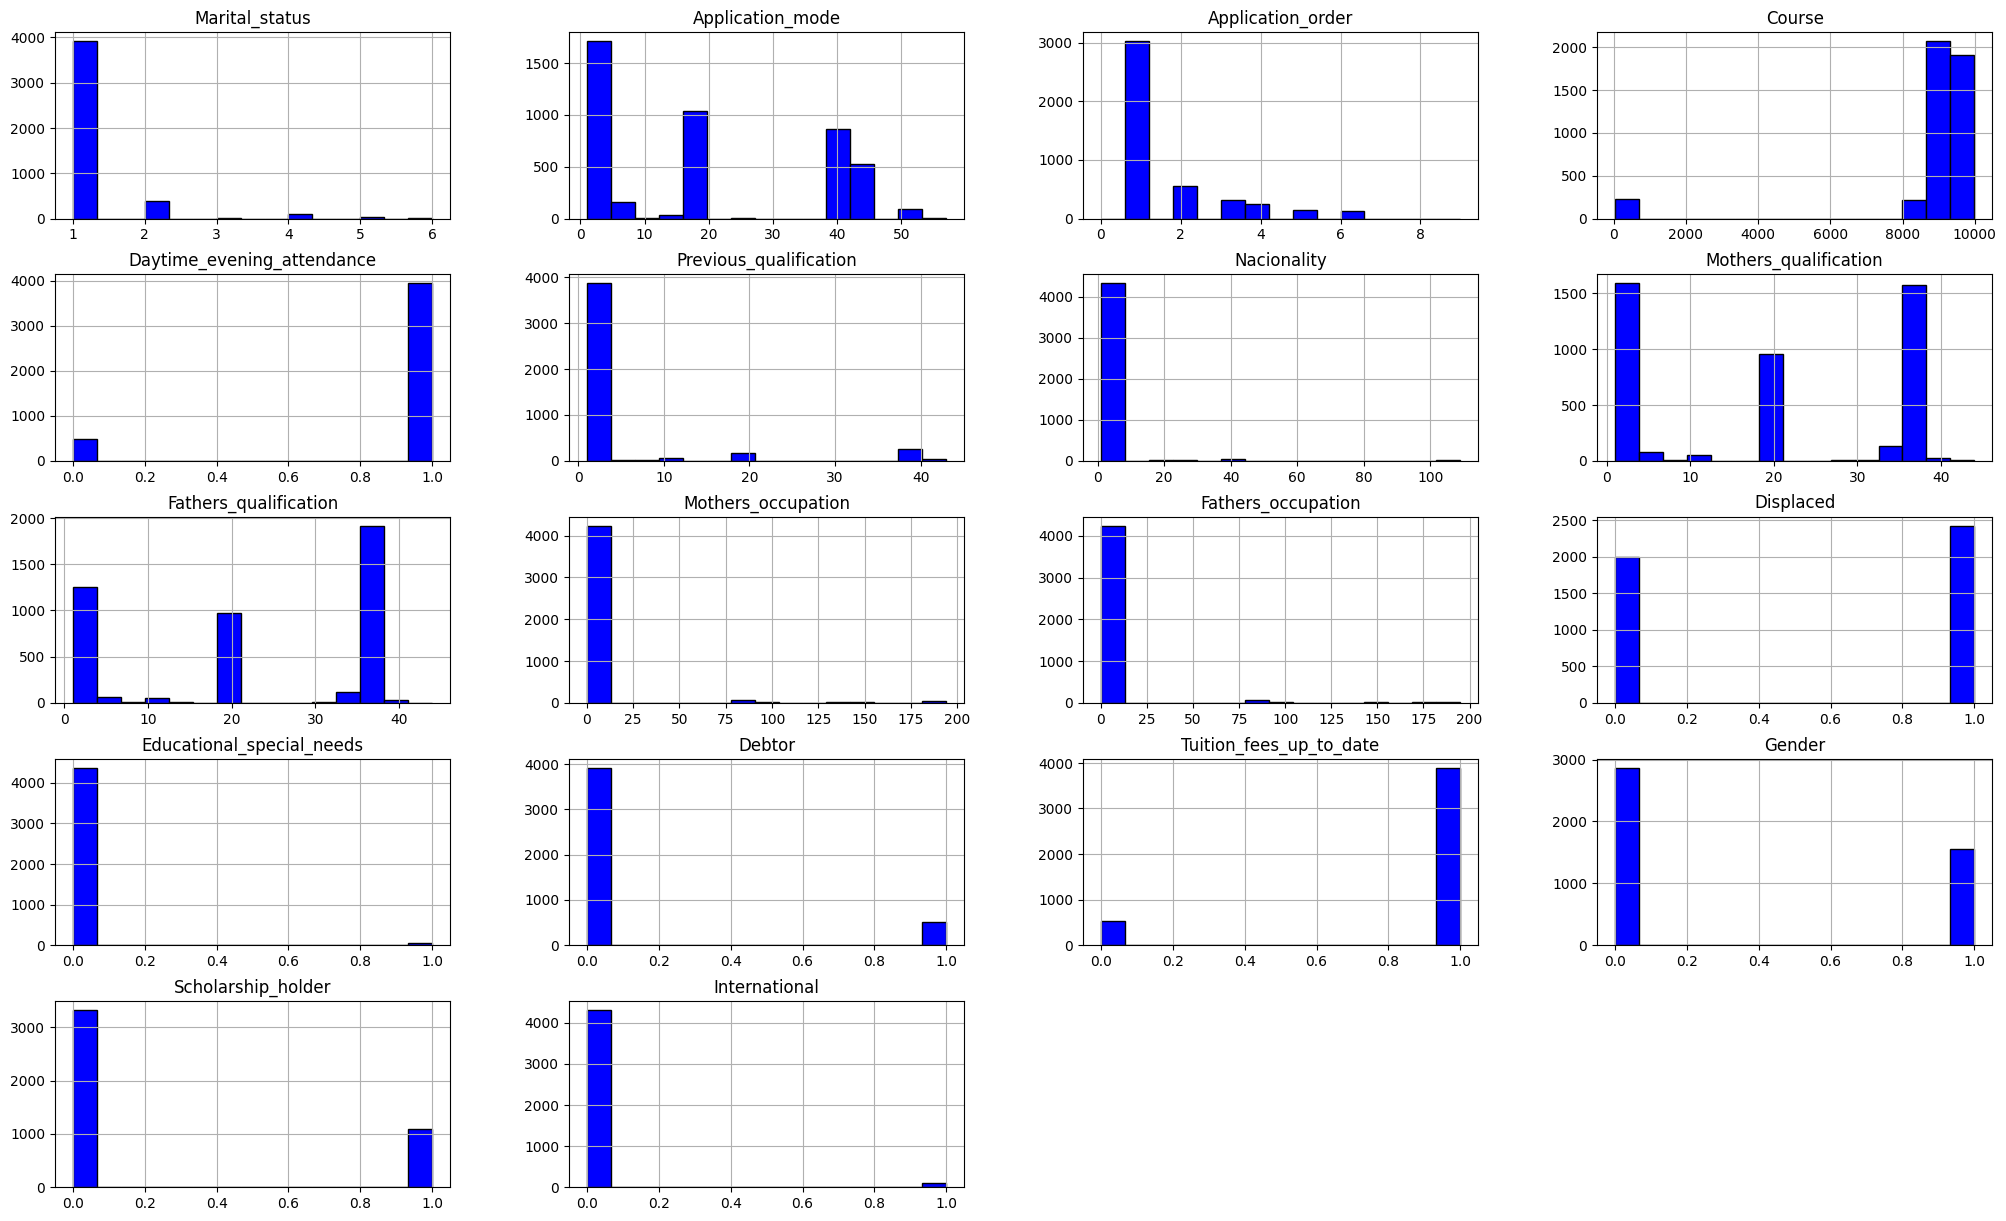

In [15]:
visualize_numerical(df, true_cat_cols)

Histogram kategori menunjukkan bahwa sebagian besar fitur kategorikal memiliki distribusi yang sangat tidak merata. Sebagian besar mahasiswa berstatus belum menikah, hadir di kelas siang, tidak memiliki kebutuhan khusus, bukan penerima beasiswa, dan bukan mahasiswa internasional. Kolom seperti **Application_mode**, **Course**, dan **Nationality** menunjukkan dominasi satu atau dua nilai kategori dengan banyak kategori minor. Orang tua mahasiswa mayoritas memiliki kode pendidikan dan pekerjaan tertentu, sementara sebagian besar mahasiswa tidak memiliki hutang (**Debtor**) dan membayar biaya kuliah tepat waktu. Ketidakseimbangan ini penting diperhatikan karena dapat memengaruhi analisis dan performa model klasifikasi, terutama dalam konteks feature importance dan overfitting.


### Visualisasi Kolom *Object*

In [16]:
def visualize_categorical(df, cols, ncols=3):
    # Set jumlah kolom per baris
    n_cols = ncols
    n_rows = math.ceil(len(cols) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, feature in enumerate(cols):
        rotate = 45 if len(df[feature].unique()) > 5 else 0
        
        if feature == 'Department':
            rotate = 30
        
        sns.countplot(data=df, x=feature, ax=axes[i])
        axes[i].set_title(f"Count Plot for {feature}")
        axes[i].tick_params(axis='x', rotation=rotate)

    # Matikan subplot kosong (jika ada)
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

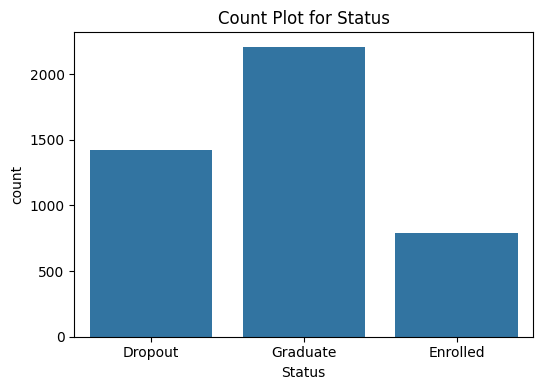

In [17]:
categorical_cols = df.select_dtypes(include=['object']).columns

visualize_categorical(df, categorical_cols, ncols=3)

Data siswa di dominasi dengan kategori siswa *graduate* yang memperoleh banyak data tertinggi. Terdapat ketidakseimbangan data label yang ditandai dengan label *enrolled* yang terbilang paling sedikit daripada kategori lainnya.

### Distribusi Kolom Non Kategorikal

In [18]:
# Helper visualisasi Boxplot
def boxplot_visualize_helper(df, col):
    sns.boxplot(x=df[col])
    plt.title(f'Kolom {col}')
    plt.show()

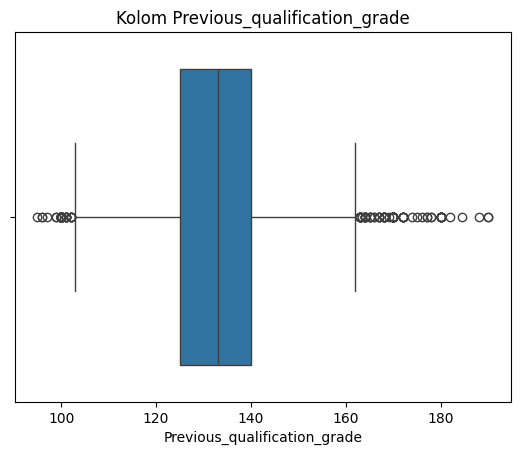

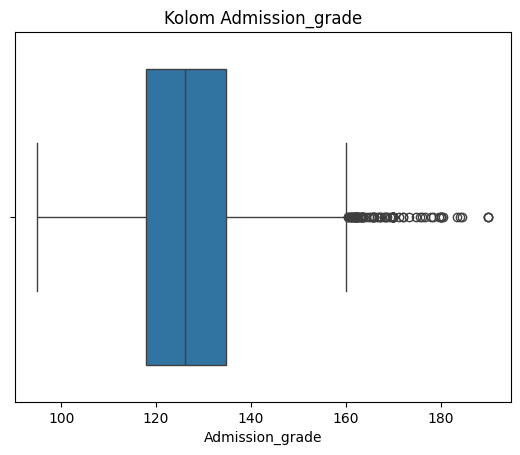

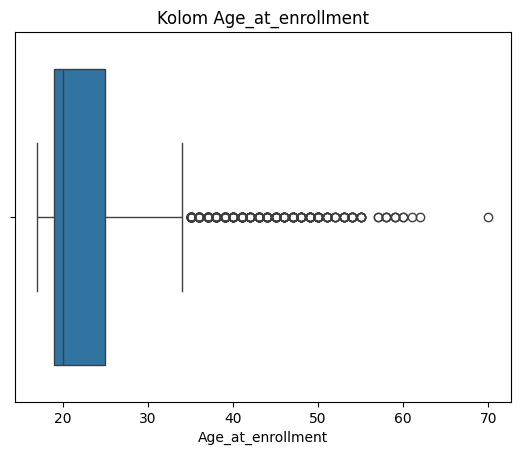

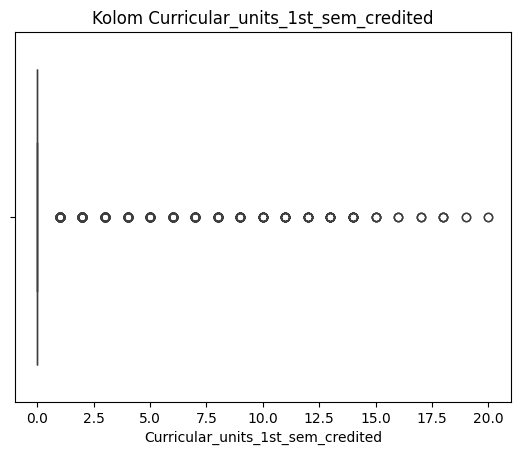

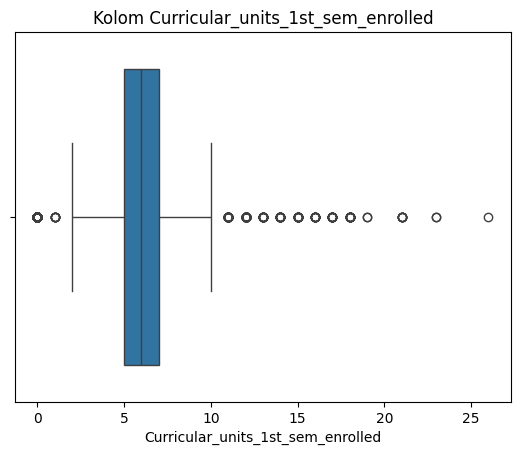

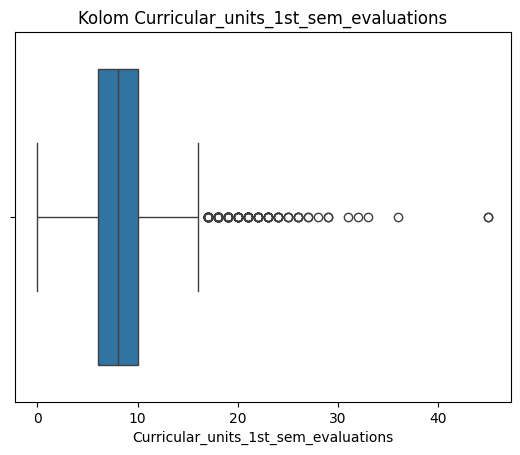

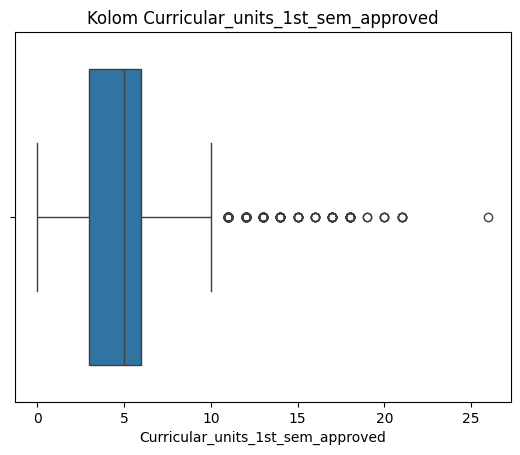

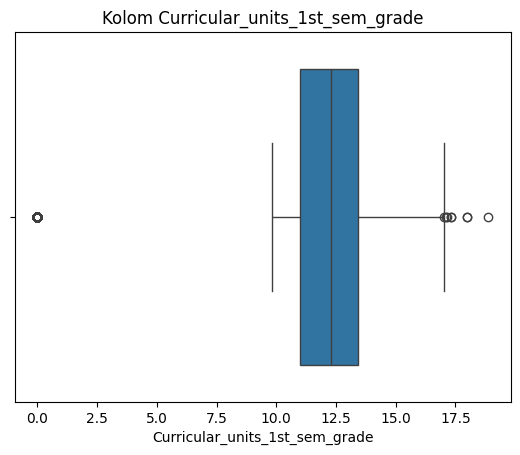

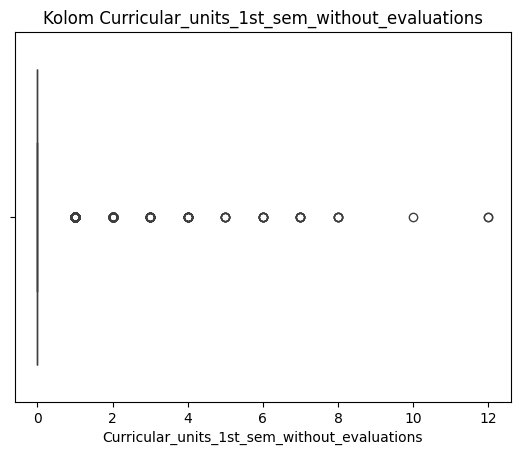

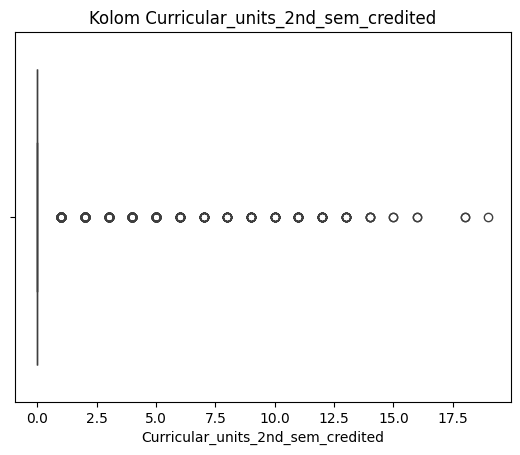

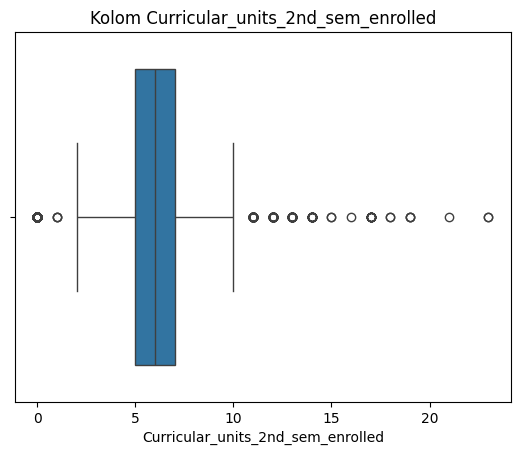

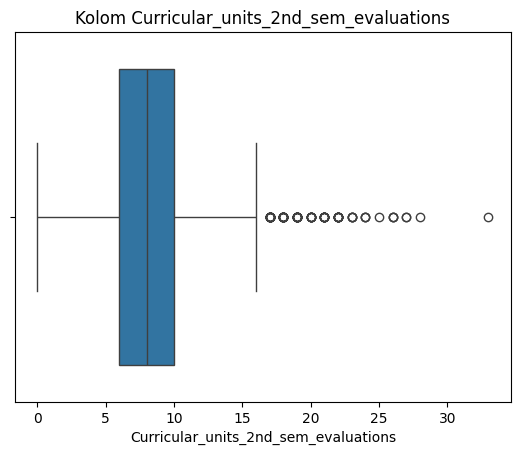

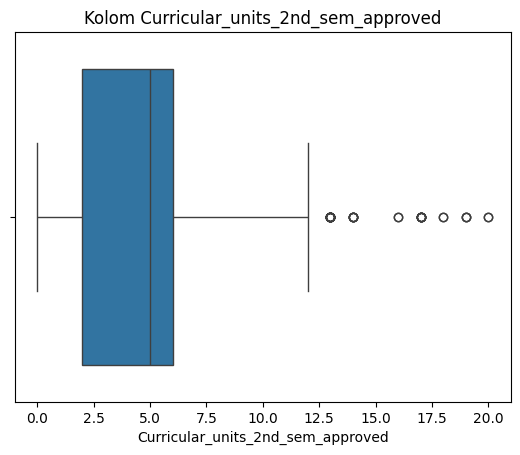

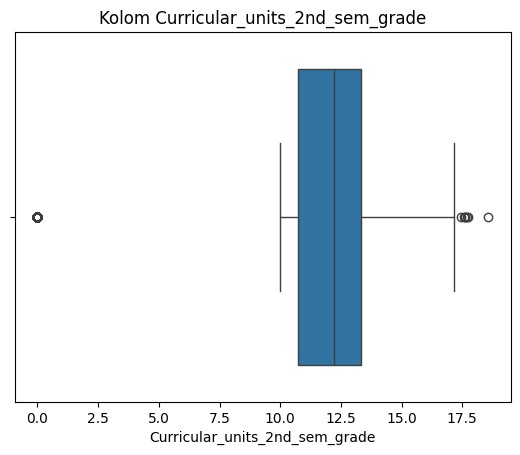

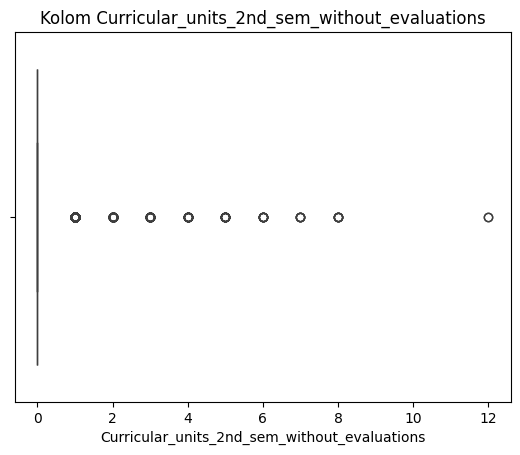

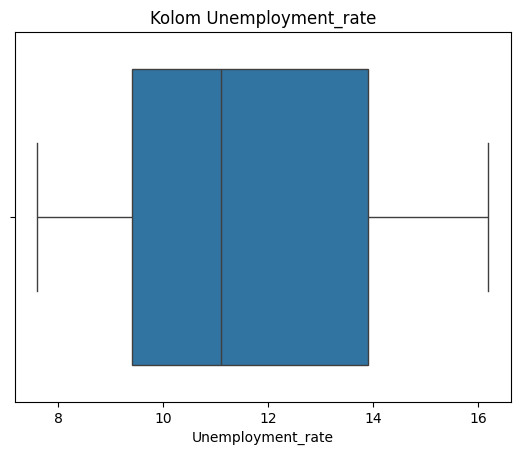

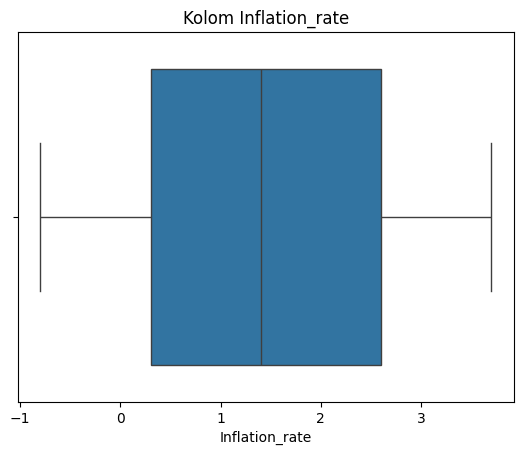

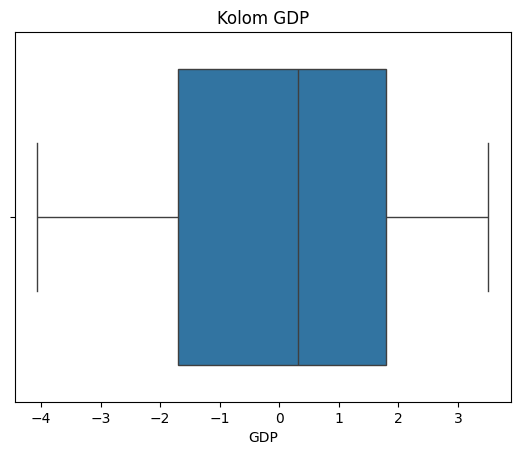

In [19]:
non_cat_cols = [col for col in df.columns.tolist() 
                if col not in true_cat_cols
                and col != 'Status']

for col in non_cat_cols:
    boxplot_visualize_helper(df, col)

Dari hasil visualisasi data dengan kategori *number* namun masih tergolong nilai kategorikal maupun non kategorikal, hasilnya terdapat beberapa *outliers*, namun jika dihapus akan menghilangkan banyak informasi. Sebab data yang ada terbilang cukup sedikit. Maka akan tetap dipertahankan.

## Feature Engineering

1. Total_units_enrolled: Menambahkan kolom jumlah *enrolled units* di Semester 1 dan 2.

In [20]:
def total_units_enrolled_col(df):
    total_enrolled_un = (df['Curricular_units_1st_sem_enrolled'] + 
                         df['Curricular_units_2nd_sem_enrolled'])

    df['Total_units_enrolled'] = total_enrolled_un

    return df

In [21]:
df = total_units_enrolled_col(df)

2. Total_units_approved: Menambahkan kolom jumlah *approved units* di Semester 1 dan 2.

In [ ]:
def total_units_approved_col(df):
    total_approved_un = (df['Curricular_units_1st_sem_approved'] + 
                         df['Curricular_units_2nd_sem_approved'])

    df['Total_units_approved'] = total_approved_un

    return df

In [23]:
df = total_units_approved_col(df)

3. Approval_rate: Menambahkan kolom rata-rata *rate total approved units* dengan *total enrolled units*.

In [24]:
def approval_rate_col(df):
    approval_rate = (df['Total_units_approved'] /
                     df['Total_units_enrolled'])

    df['Approval_rate'] = approval_rate
    df['Approval_rate'] = df['Approval_rate'].fillna(0)

    return df

In [25]:
df = approval_rate_col(df)

4. Weighted_avg_grade: Menambahkan kolom rata-rata operasi kombinasi *enrolled units* dengan *grade* siswa di setiap semesternya.

In [26]:
def weighted_avg_grade_col(df):
    total_credits = (df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled'])
    weigthed_grade = ((df['Curricular_units_1st_sem_grade'] * df['Curricular_units_1st_sem_enrolled']) +
                       (df['Curricular_units_2nd_sem_grade'] * df['Curricular_units_2nd_sem_enrolled']) /
                       total_credits) 

    df['Weighted_avg_grade'] = weigthed_grade

    df['Weighted_avg_grade'] = df['Weighted_avg_grade'].fillna(0, axis=0)

    return df

In [27]:
df = weighted_avg_grade_col(df)

5. Total_units_without_eval: Menambahkan kolom jumlah total *units* yang tidak berstatus *evaluation*.

In [28]:
def units_without_eval_col(df):
    without_eval = (df['Curricular_units_1st_sem_without_evaluations'] +
                    df['Curricular_units_2nd_sem_without_evaluations'])

    df['Total_units_without_eval'] = without_eval
    
    return df

In [29]:
df = units_without_eval_col(df)

6. Econ_pressure: Menambahkan kolom kombinasi beban ekonomi siswa.

In [30]:
def econ_pressure_col(df):
    marital_weight = np.where(df['Marital_status'] == 1, 1, 2)
    debtor_weight = np.where(df['Debtor'] == 1, 1.5, 1)  # lebih berat kalau berutang
    gender_weight = np.where(df['Gender'] == 1, 1.5, 1)

    total_weight = marital_weight * debtor_weight * gender_weight

    df['Econ_pressure'] = (df['Unemployment_rate'] * df['Inflation_rate']) * total_weight
    return df

In [31]:
df = econ_pressure_col(df)
cleaned_df = df

## Analisis *Matrix Correlation*

**Encoding Kolom Status**

In [32]:
le = LabelEncoder()

cleaned_df['Status'] = le.fit_transform(cleaned_df['Status'])

In [33]:
label_dict = {i: label for i, label in enumerate(le.classes_)}

with open(f'{DATA_PATH}/jsons/status.json', 'w') as f:
    json.dump(label_dict, f)
    
print(label_dict)

{0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}


**Visualisasi Matrix Correlation**

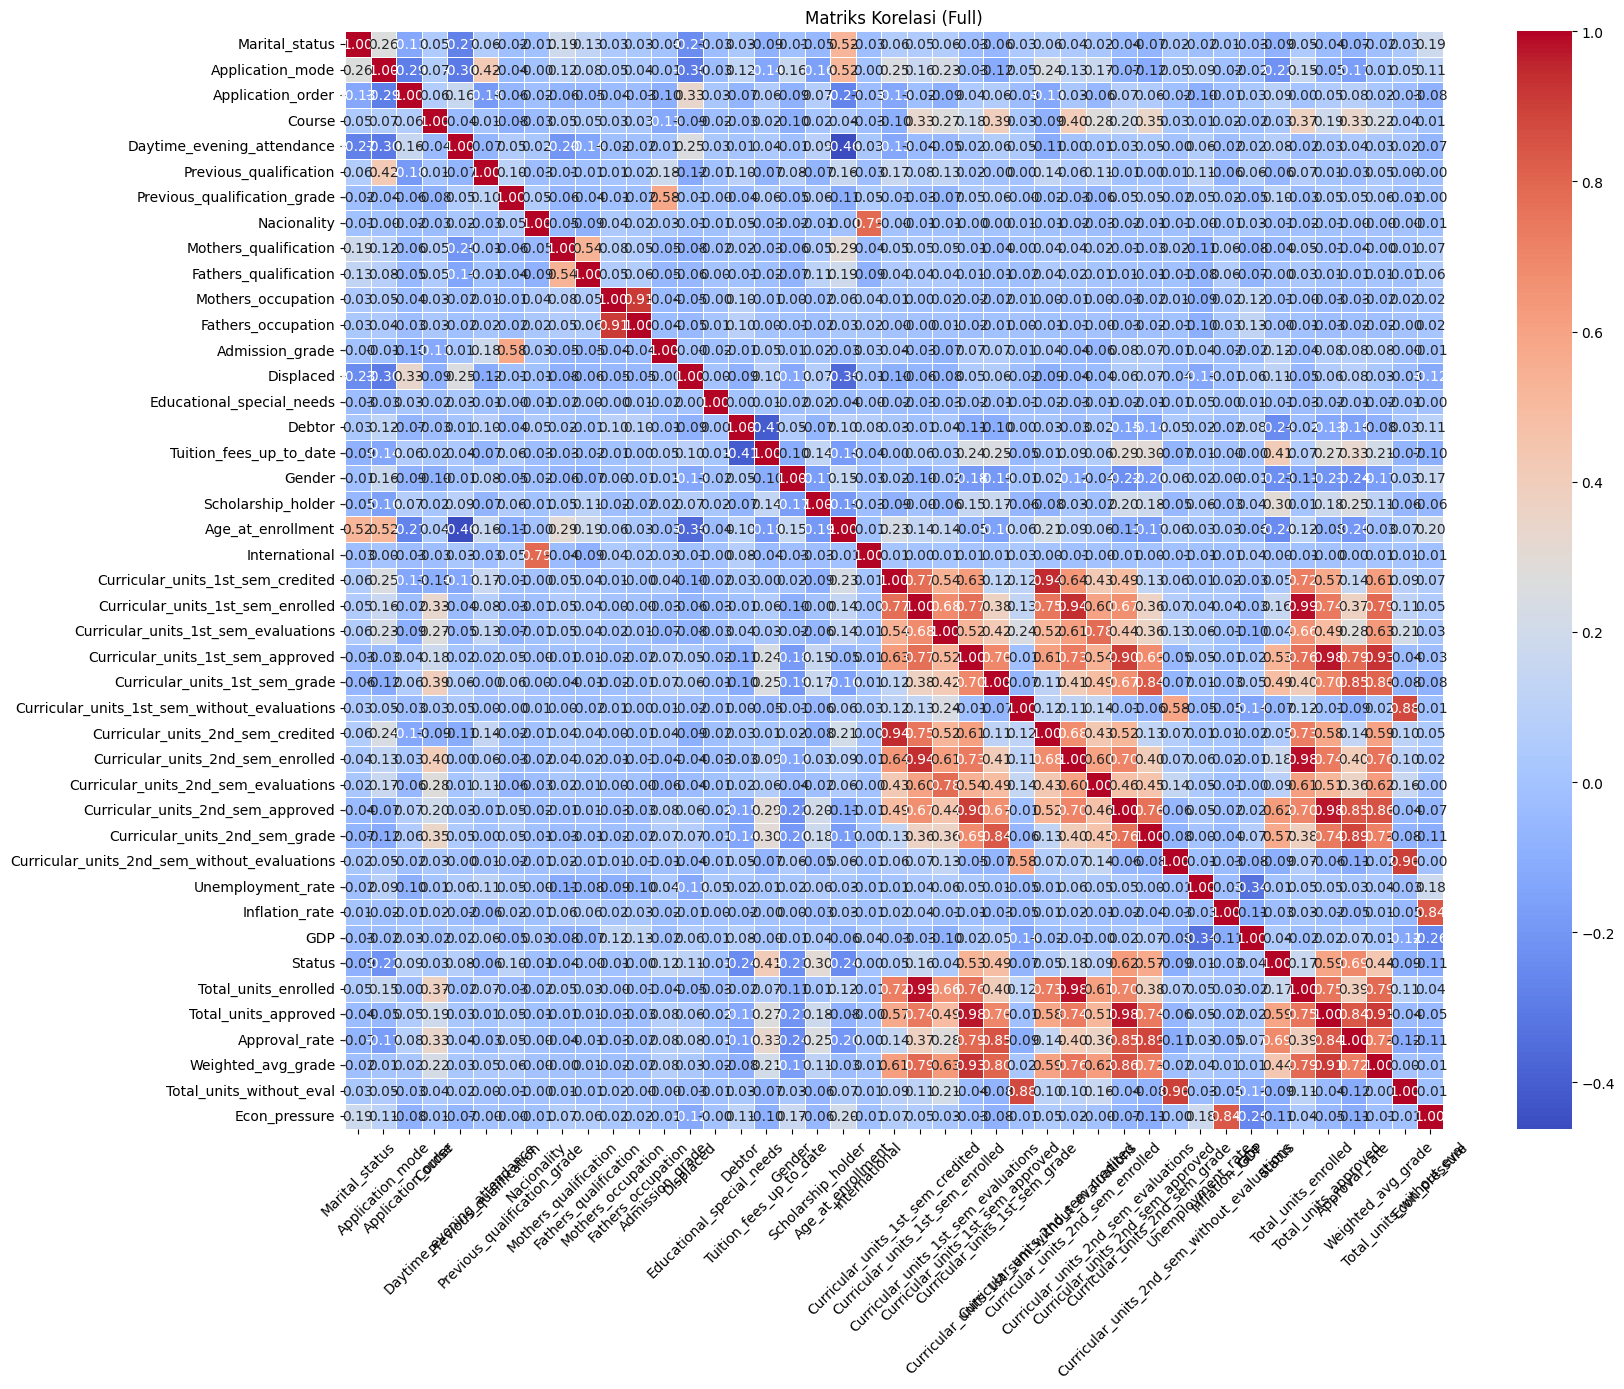

In [34]:
matrix_corr_cols = cleaned_df.select_dtypes(include=['number'])

# Hitung matriks korelasi
correlation_matrix = matrix_corr_cols.corr()

# Buat heatmap dari matriks korelasi
plt.figure(figsize=(18, 14))  # Perbesar sesuai kebutuhan
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Matriks Korelasi (Full)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Dari hasil visualisasi di atas, hasilnya masih sangat sulit dibaca karena belum melakukan *feature selection*. *Feature selection* dilakukan dengan melihat kolom-kolom yang berkorelasi terhadap kolom **Status**.

In [35]:
# Korelasi dengan target Status
target_corr = correlation_matrix['Status'].sort_values(ascending=False)
print(target_corr)

Status                                          1.000000
Approval_rate                                   0.686278
Curricular_units_2nd_sem_approved               0.624157
Total_units_approved                            0.590362
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Weighted_avg_grade                              0.439910
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Total_units_enrolled                            0.167721
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order              

Dari uraian hasil grouping korelasi matriks terhadap kolom **Status** di atas, akan diambil kolom dengan korelasi positif dan negatif dengan *threshold* minimal 0.20 dan maksimal -0.20.

## Feature Selection

Seleksi fitur dilakukan dengan mengambil kolom yang berkorelasi positif dan negatif, dengan *threshold* seperti yang sudah dijelaskan di atas.

In [36]:
strong_corr_cols = target_corr[(target_corr >= 0.09) | (target_corr <= -0.09)]
strong_corr_cols

Status                                          1.000000
Approval_rate                                   0.686278
Curricular_units_2nd_sem_approved               0.624157
Total_units_approved                            0.590362
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Weighted_avg_grade                              0.439910
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Total_units_enrolled                            0.167721
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Total_units_without_eval       

In [37]:
selected_df = cleaned_df[strong_corr_cols.keys()]
selected_df.head()

,Status,Approval_rate,Curricular_units_2nd_sem_approved,Total_units_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Weighted_avg_grade,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_2nd_sem_enrolled,Total_units_enrolled,Curricular_units_1st_sem_enrolled,Admission_grade,Displaced,Previous_qualification_grade,Curricular_units_2nd_sem_evaluations,Total_units_without_eval,Curricular_units_2nd_sem_without_evaluations,Econ_pressure,Application_mode,Gender,Debtor,Age_at_enrollment
0,0,0.000000,0,0,0.000000,0,0.000000,0.000000,1,0,0,0,0,127.3,1,122.0,0,0,0,22.680,17,1,0,20
1,2,1.000000,6,12,13.666667,6,14.000000,90.833333,0,0,6,12,6,142.5,1,160.0,6,0,0,-6.255,15,1,0,19
2,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,6,12,6,124.8,1,122.0,0,0,0,22.680,1,1,0,19
3,2,0.916667,5,11,12.400000,6,13.428571,86.771429,1,0,6,12,6,119.6,1,122.0,10,0,0,-7.520,17,0,0,20
4,2,0.916667,6,11,13.000000,5,12.333333,80.500000,1,0,6,12,6,141.5,0,100.0,6,0,0,-8.340,39,0,0,45


## Rescaling Value

In [38]:
# Cek distribusi data sekarang
selected_df.describe()

,Status,Approval_rate,Curricular_units_2nd_sem_approved,Total_units_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Weighted_avg_grade,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_2nd_sem_enrolled,Total_units_enrolled,Curricular_units_1st_sem_enrolled,Admission_grade,Displaced,Previous_qualification_grade,Curricular_units_2nd_sem_evaluations,Total_units_without_eval,Curricular_units_2nd_sem_without_evaluations,Econ_pressure,Application_mode,Gender,Debtor,Age_at_enrollment
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178119,0.679076,4.435805,9.142405,10.230206,4.706600,10.640822,76.366591,0.880651,0.248418,6.232143,12.502712,6.270570,126.978119,0.548373,132.613314,8.063291,0.287975,0.150316,19.564001,18.669078,0.351718,0.113698,23.265145
std,0.888243,0.361945,3.014764,5.960612,5.210808,3.094238,4.843663,43.698436,0.324235,0.432144,2.195951,4.608821,2.480178,14.482001,0.497711,13.188332,3.947951,1.285682,0.753774,26.709285,17.484682,0.477560,0.317480,7.587816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,95.000000,0.000000,0.000000,0.000000,-33.840000,1.000000,0.000000,0.000000,17.000000
25%,0.000000,0.500000,2.000000,5.000000,10.750000,3.000000,11.000000,64.825000,1.000000,0.000000,5.000000,10.000000,5.000000,117.900000,0.000000,125.000000,6.000000,0.000000,0.000000,6.200000,1.000000,0.000000,0.000000,19.000000
50%,1.000000,0.833333,5.000000,10.000000,12.200000,5.000000,12.285714,79.969322,1.000000,0.000000,6.000000,12.000000,6.000000,126.100000,1.000000,133.100000,8.000000,0.000000,0.000000,13.320000,17.000000,0.000000,0.000000,20.000000
75%,2.000000,1.000000,6.000000,12.000000,13.333333,6.000000,13.400000,95.750000,1.000000,0.000000,7.000000,14.000000,7.000000,134.800000,1.000000,140.000000,10.000000,0.000000,0.000000,29.640000,39.000000,1.000000,0.000000,25.000000
max,2.000000,1.000000,20.000000,43.000000,18.571429,26.000000,18.875000,397.961757,1.000000,1.000000,23.000000,46.000000,26.000000,190.000000,1.000000,190.000000,33.000000,24.000000,12.000000,211.455000,57.000000,1.000000,1.000000,70.000000


Terdapat satu kolom dengan standar deviasi lebih tinggi daripada yang lain, yaitu **Weighted_avg_grade**. Maka dari itu, perlu dilakukan scaling pada kolom tersebut.

In [39]:
scaler = MinMaxScaler()

selected_df['Weighted_avg_grade'] = scaler.fit_transform(pd.DataFrame(selected_df['Weighted_avg_grade']))

joblib.dump(scaler, 'models/weightedAvgGrade.pkl')

C:\Users\legion\AppData\Local\Temp\ipykernel_11708\1533927442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Weighted_avg_grade'] = scaler.fit_transform(pd.DataFrame(selected_df['Weighted_avg_grade']))


['models/weightedAvgGrade.pkl']

### Cek Count Status

In [40]:
cnt_status = selected_df['Status'].value_counts().sort_index(ascending=False).reset_index()
cnt_status.columns = ['Status', 'Count']
cnt_status

,Status,Count
0,2,2209
1,1,794
2,0,1421


Dari hasil inspeksi di atas, maka perlu dilakukan proses *Undersampling* pada label 2 yaitu **Graduate**. Undersampling disesuaikan dengan jumlah label 1 yaitu **Dropout** karena fokusnya hanya pada dua label ini.

## Train Test Split

In [41]:
# Fungsi helper splitting data
def splitting_data_helper(df):
    # Memisahkan data menjadi fitur dan target
    X = df.drop(columns=['Status'])
    y = df['Status']
    
    # Menyimpan kolom dari X
    joblib.dump(X.columns.tolist(), 'models/feature_columns.pkl')

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [42]:
x_train, x_test, y_train, y_test = splitting_data_helper(selected_df)

## Resampling Data

Proses *resampling data* menggunakan ADASYN, sebab terdapat label yang memiliki jumlah drastis lebih rendah dari yang lain.

In [43]:
adasyn = ADASYN(sampling_strategy={1: max(Counter(y_train).values())}, random_state=42)
x_train, y_train = adasyn.fit_resample(x_train, y_train)

In [44]:
y_train.value_counts()

Status
2    1791
1    1668
0    1105
Name: count, dtype: int64

## Dimentional Reduction (PCA)

Reduksi dimensi dilakukan untuk mengurangi kompleksitas dimensi data yang akan dilatih, sebab kolom yang dipilih cukup banyak (dari penerapan threshold).

In [45]:
# Fungsi helper PCA
def pca_helper(X_train, X_test, n_components=0.95):
    # PCA untuk reduksi dimensi
    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    return X_train_pca, X_test_pca, pca

In [46]:
x_train_pca, x_test_pca, pca = pca_helper(x_train, x_test, n_components=0.99)
joblib.dump(pca, 'models/pca.pkl')

['models/pca.pkl']

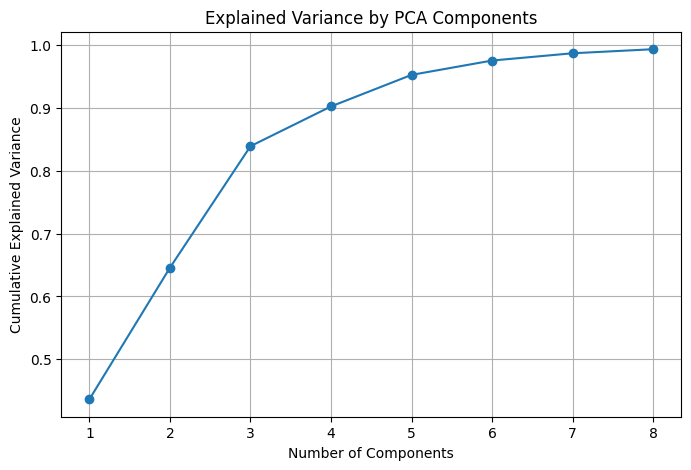

In [47]:
explained_variance = pca.explained_variance_ratio_

# Plot scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Modeling

## Deep Learning (Tensorflow)

Model akan menggunakan *Neural Network Classification* dengan menggunakan *library* Tensorflow.

In [48]:
def objective_nn(trial, X_train, y_train, X_val, y_val):
    # Hyperparameter suggestion
    n_layers = trial.suggest_int('n_layers', 1, 7)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    units = trial.suggest_int('units', 32, 256)

    # Build model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    
    for _ in range(n_layers - 1):
        model.add(tf.keras.layers.Dense(units, activation='relu'))
        # model.add(tf.keras.layers.Dropout(dropout_rate))
    
    # Output layer for 3 classes
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=[SparseCategoricalAccuracy()]
    )

    # Early stopping
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True
    )

    # Fit
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        verbose=0,
        callbacks=[early_stop]
    )

    # Return last validation accuracy (negated so Optuna maximizes it)
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    return 1.0 - val_acc  # minimize objective → maximize accuracy

In [49]:
study_nn = optuna.create_study(direction="minimize")
study_nn.optimize(lambda trial:
    objective_nn(trial, x_train_pca, y_train, x_test_pca, y_test),
    n_trials=50
)
print("Best NN params:", study_nn.best_params)


[I 2025-05-08 05:56:16,893] A new study created in memory with name: no-name-ba799d09-e430-4988-b28f-00ab8f556b5a
c:\Users\legion\miniconda3\envs\ds-terap\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-05-08 05:56:20,185] Trial 0 finished with value: 0.3333333134651184 and parameters: {'n_layers': 3, 'dropout_rate': 0.22713110911670648, 'learning_rate': 0.0028245726724579353, 'units': 116}. Best is trial 0 with value: 0.3333333134651184.
[I 2025-05-08 05:56:23,343] Trial 1 finished with value: 0.3197740316390991 and parameters: {'n_layers': 2, 'dropout_rate': 0.2527051610850518, 'learning_rate': 0.00010120641591657946, 'units': 171}. Best is trial 1 with value: 0.3197740316390991.
[I 2025-05-08 05:56:27,921] Trial 2 fini

Best NN params: {'n_layers': 7, 'dropout_rate': 0.028728823346167318, 'learning_rate': 0.0012445738439605801, 'units': 146}


Dari hasil *searching hyperparameter tuning* menggunakan **Optuna**, hasil terbaik yang diperoleh dari kombinasi-kombinasi *hyperparameter* yang ditambahkan yaitu:

- n_layers: 5 unit
- dropout_rate: 0.2616125988803917
- learning_rate: 0.00682595867229088
- units: 42

Selanjutnya, dilanjutkan proses *modelling* model *production* menggunakan parameter terbaik hasil dari pengujian **Optuna**.

In [50]:
best_params = study_nn.best_params

# Build model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(best_params['units'], activation='relu', input_shape=(x_train_pca.shape[1],)))
model.add(tf.keras.layers.Dropout(best_params['dropout_rate']))

for _ in range(best_params['n_layers'] - 1):
    model.add(tf.keras.layers.Dense(best_params['units'], activation='relu'))

# Output layer for 3 classes
model.add(tf.keras.layers.Dense(3, activation='softmax'))
# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
    loss='sparse_categorical_crossentropy',
    metrics=[SparseCategoricalAccuracy()]
)
# Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)
# Fit
history = model.fit(
    x_train_pca, y_train,
    validation_data=(x_test_pca, y_test),
    epochs=100,
    batch_size=32,
    verbose=0,
    callbacks=[early_stop]
)

model.save('models/model.keras')

## XGBoost Classifier

In [51]:
def cross_validation_helper(model, X, y, cv=3):
    # Gunakan f1-score macro untuk menangani ketidakseimbangan antar kelas
    return cross_val_score(
        model, X, y, 
        scoring=make_scorer(f1_score, average='macro'), 
        cv=cv
    ).mean()

# Fungsi objective Optuna untuk XGBoost Classifier
def objective_xgb(trial, X_train, y_train):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
        "objective": "multi:softprob",
        "num_class": 3,
        "random_state": 42,
    }

    model = XGBClassifier(**params)
    score = cross_validation_helper(model, X_train, y_train, cv=3)
    return -1.0 * score

In [52]:
study_xgb = optuna.create_study(direction="minimize")
study_xgb.optimize(lambda trial: objective_xgb(trial, x_train_pca, y_train), n_trials=50)

print("Best XGBoost params:", study_xgb.best_params)

[I 2025-05-08 05:59:32,461] A new study created in memory with name: no-name-47cafd9b-07df-46e3-8fe3-2ad2f5159ed1
[I 2025-05-08 05:59:32,937] Trial 0 finished with value: -0.7060894787532247 and parameters: {'n_estimators': 120, 'max_depth': 3, 'learning_rate': 0.1648434680207884, 'subsample': 0.6986280499593044, 'colsample_bytree': 0.724036964400415, 'reg_alpha': 0.11779583903368374, 'reg_lambda': 0.4327095203429331}. Best is trial 0 with value: -0.7060894787532247.
[I 2025-05-08 05:59:34,927] Trial 1 finished with value: -0.7287111071405007 and parameters: {'n_estimators': 587, 'max_depth': 4, 'learning_rate': 0.2611737133312341, 'subsample': 0.9219251934914932, 'colsample_bytree': 0.5130561233603204, 'reg_alpha': 0.4643187386079667, 'reg_lambda': 0.027049715880441805}. Best is trial 1 with value: -0.7287111071405007.
[I 2025-05-08 05:59:35,956] Trial 2 finished with value: -0.7448427957405933 and parameters: {'n_estimators': 118, 'max_depth': 9, 'learning_rate': 0.26351028795663034,

Best XGBoost params: {'n_estimators': 423, 'max_depth': 9, 'learning_rate': 0.098417717166669, 'subsample': 0.5334654964999609, 'colsample_bytree': 0.9779497704021999, 'reg_alpha': 0.5926291590999233, 'reg_lambda': 0.6040848312121577}


Dari hasil *searching hyperparameter tuning* menggunakan **Optuna**, hasil terbaik yang diperoleh dari kombinasi-kombinasi *hyperparameter* yang ditambahkan yaitu:

- n_estimators: 475 unit
- max_depth: 9
- learning_rate: 0.034864297275527936
- subsample: 0.5429435777320513
- colsample_bytree: 0.9804638399367159
- reg_alpha: 0.12432868765828575
- reg_lambda: 0.024369878964990613

Selanjutnya, dilanjutkan proses *modelling* model *production* menggunakan parameter terbaik hasil dari pengujian **Optuna**.

In [53]:
# Evaluasi model terbaik (XGBoost)
best_xgb = XGBClassifier(**study_xgb.best_params)
best_xgb.fit(x_train_pca, y_train)

joblib.dump(best_xgb, 'models/xgb_model.pkl')

['models/xgb_model.pkl']

# Evaluation

## Deep Learning (Tensorflow)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.58      0.68       316
           1       0.35      0.52      0.42       151
           2       0.78      0.82      0.80       418

    accuracy                           0.68       885
   macro avg       0.65      0.64      0.64       885
weighted avg       0.73      0.68      0.69       885

Accuracy Score: 0.6847457627118644


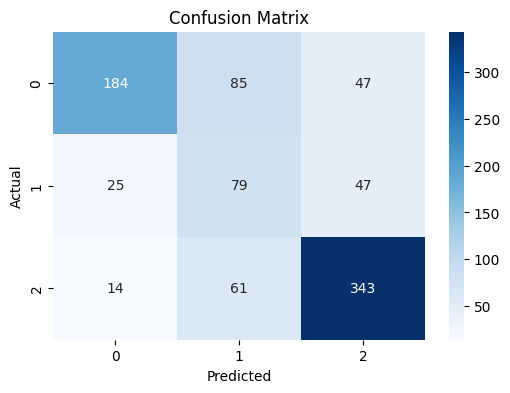

In [54]:
# --- Prediction ---
y_pred_probs = model.predict(x_test_pca)
y_pred = np.argmax(y_pred_probs, axis=1)

# --- Evaluation Metrics ---
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

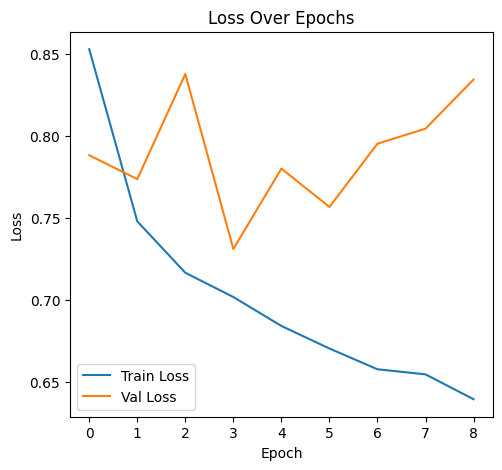

In [55]:
# Plot loss
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

## XGBoost

In [56]:
def evaluate_classification_model(model, X_test, y_test, class_names=None):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1) if y_pred.ndim > 1 else y_pred

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Classification Report
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred_classes, target_names=class_names))

    # ROC Curve (Multiclass)
    if len(np.unique(y_test)) == 3:
        y_test_bin = label_binarize(y_test, classes=[0,1,2])
        if y_pred.ndim == 1:
            y_pred_bin = label_binarize(y_pred_classes, classes=[0,1,2])
        else:
            y_pred_bin = y_pred

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(3):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(7,5))
        for i in range(3):
            plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title('ROC Curve - Multiclass')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


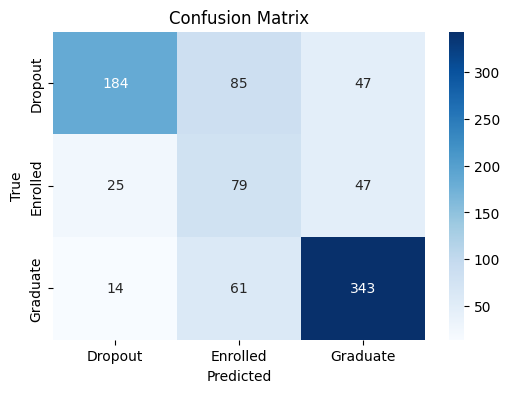

Classification Report:

              precision    recall  f1-score   support

     Dropout       0.83      0.58      0.68       316
    Enrolled       0.35      0.52      0.42       151
    Graduate       0.78      0.82      0.80       418

    accuracy                           0.68       885
   macro avg       0.65      0.64      0.64       885
weighted avg       0.73      0.68      0.69       885



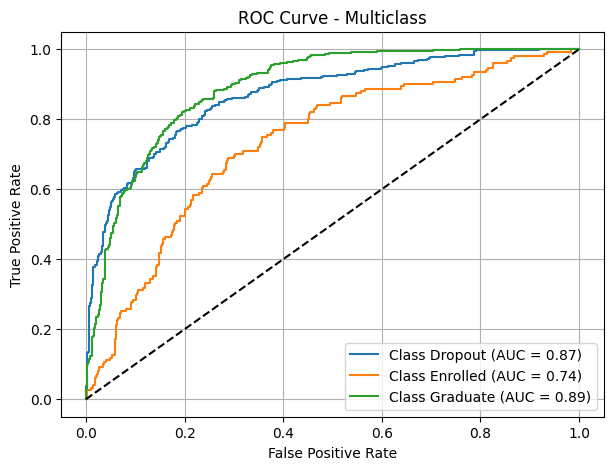

In [57]:
# Ambil label unik yang muncul di y_test
unique_labels = sorted(y_test.unique())  # jika y_test berbentuk pandas Series

# Buat class_names berdasarkan urutan label yang muncul di y_test
class_names = [label_dict[i] for i in unique_labels]

evaluate_classification_model(model, x_test_pca, y_test, class_names)